In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [3]:
import pandas as pd
df = pd.read_csv('TimeWastersOnSocialMedia.csv')
df.head()

,UserID,Age,Gender,Location,Income,Debt,Owns Property,Profession,Demographics,Platform,...,ProductivityLoss,Satisfaction,Watch Reason,DeviceType,OS,Watch Time,Self Control,Addiction Level,CurrentActivity,ConnectionType
0,1,56,Male,Pakistan,82812,True,True,Engineer,Rural,Instagram,...,3,7,Procrastination,Smartphone,Android,9:00 PM,5,5,Commuting,Mobile Data
1,2,46,Female,Mexico,27999,False,True,Artist,Urban,Instagram,...,5,5,Habit,Computer,Android,5:00 PM,7,3,At school,Wi-Fi
2,3,32,Female,United States,42436,False,True,Engineer,Rural,Facebook,...,6,4,Entertainment,Tablet,Android,2:00 PM,8,2,At home,Mobile Data
3,4,60,Male,Barzil,62963,True,False,Waiting staff,Rural,YouTube,...,3,7,Habit,Smartphone,Android,9:00 PM,5,5,Commuting,Mobile Data
4,5,25,Male,Pakistan,22096,False,True,Manager,Urban,TikTok,...,8,2,Boredom,Smartphone,iOS,8:00 AM,10,0,At home,Mobile Data


In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   UserID                    1000 non-null   int64 
 1   Age                       1000 non-null   int64 
 2   Gender                    1000 non-null   object
 3   Location                  1000 non-null   object
 4   Income                    1000 non-null   int64 
 5   Debt                      1000 non-null   bool  
 6   Owns Property             1000 non-null   bool  
 7   Profession                1000 non-null   object
 8   Demographics              1000 non-null   object
 9   Platform                  1000 non-null   object
 10  Total Time Spent          1000 non-null   int64 
 11  Number of Sessions        1000 non-null   int64 
 12  Video ID                  1000 non-null   int64 
 13  Video Category            1000 non-null   object
 14  Video Length             

In [5]:
# Check for missing values
print("\
Missing values:")
print(df.isnull().sum())

Missing values:
UserID                      0
Age                         0
Gender                      0
Location                    0
Income                      0
Debt                        0
Owns Property               0
Profession                  0
Demographics                0
Platform                    0
Total Time Spent            0
Number of Sessions          0
Video ID                    0
Video Category              0
Video Length                0
Engagement                  0
Importance Score            0
Time Spent On Video         0
Number of Videos Watched    0
Scroll Rate                 0
Frequency                   0
ProductivityLoss            0
Satisfaction                0
Watch Reason                0
DeviceType                  0
OS                          0
Watch Time                  0
Self Control                0
Addiction Level             0
CurrentActivity             0
ConnectionType              0
dtype: int64


In [6]:
# Check for duplicate rows
duplicates = df.duplicated().sum()
print(f"\
Number of duplicate rows: {duplicates}")

Number of duplicate rows: 0


In [7]:
# Display summary statistics
print("Summary statistics:")
print(df.describe())

Summary statistics:
            UserID          Age        Income  Total Time Spent  \
count  1000.000000  1000.000000   1000.000000       1000.000000   
mean    500.500000    40.986000  59524.213000        151.406000   
std     288.819436    13.497852  23736.212925         83.952637   
min       1.000000    18.000000  20138.000000         10.000000   
25%     250.750000    29.000000  38675.250000         78.000000   
50%     500.500000    42.000000  58805.000000        152.000000   
75%     750.250000    52.000000  79792.250000        223.000000   
max    1000.000000    64.000000  99676.000000        298.000000   

       Number of Sessions     Video ID  Video Length   Engagement  \
count         1000.000000  1000.000000   1000.000000  1000.000000   
mean            10.013000  4891.738000     15.214000  4997.159000   
std              5.380314  2853.144258      8.224953  2910.053701   
min              1.000000    11.000000      1.000000    15.000000   
25%              6.000000  2542

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import pickle

features = ['Total Time Spent', 'Number of Sessions', 'Engagement', 'Scroll Rate',
            'ProductivityLoss', 'Satisfaction', 'Self Control', 'Addiction Level']

In [9]:
df['impact_label'] = df['ProductivityLoss'].apply(lambda x: 1 if x > 5 else 0)

# Feature selection
features = ['Total Time Spent', 'Number of Sessions', 'Engagement', 'Scroll Rate',
            'ProductivityLoss', 'Satisfaction', 'Self Control', 'Addiction Level']
X = df[features]
y = df['impact_label']

In [10]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [11]:
# Evaluate the model
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       113
           1       1.00      1.00      1.00        87

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



In [13]:
import joblib

# Save the model
joblib.dump(model, 'social_media_impact_model2.joblib')

['social_media_impact_model2.joblib']

In [30]:
# Save the model
with open('/content/drive/MyDrive/social_media_impact_model.pkl', 'wb') as file:
    pickle.dump(model, file)

Further Analysis on the data!!

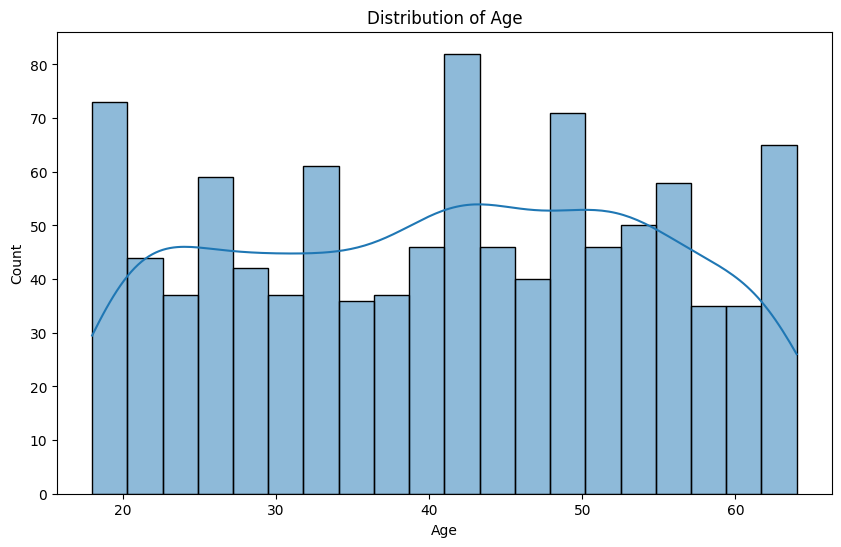

In [15]:
# 1. Distribution of Age
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

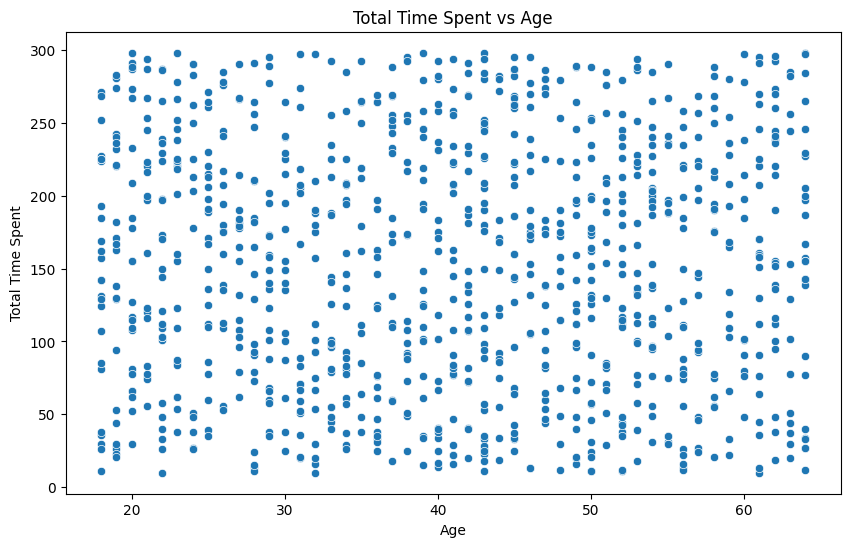

In [16]:
# 2. Total Time Spent vs Age
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Total Time Spent', data=df)
plt.title('Total Time Spent vs Age')
plt.xlabel('Age')
plt.ylabel('Total Time Spent')
plt.show()

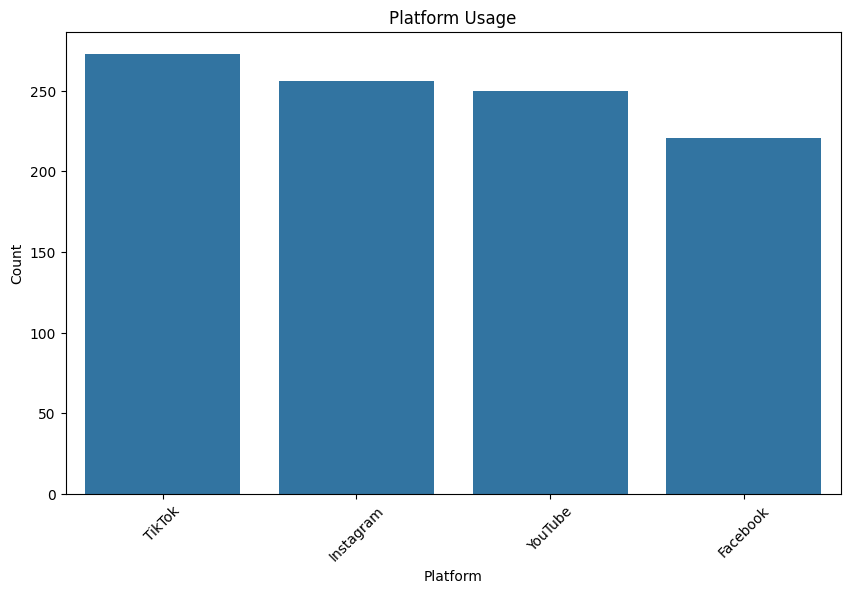

In [17]:
# 3. Platform Usage
platform_counts = df['Platform'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=platform_counts.index, y=platform_counts.values)
plt.title('Platform Usage')
plt.xlabel('Platform')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

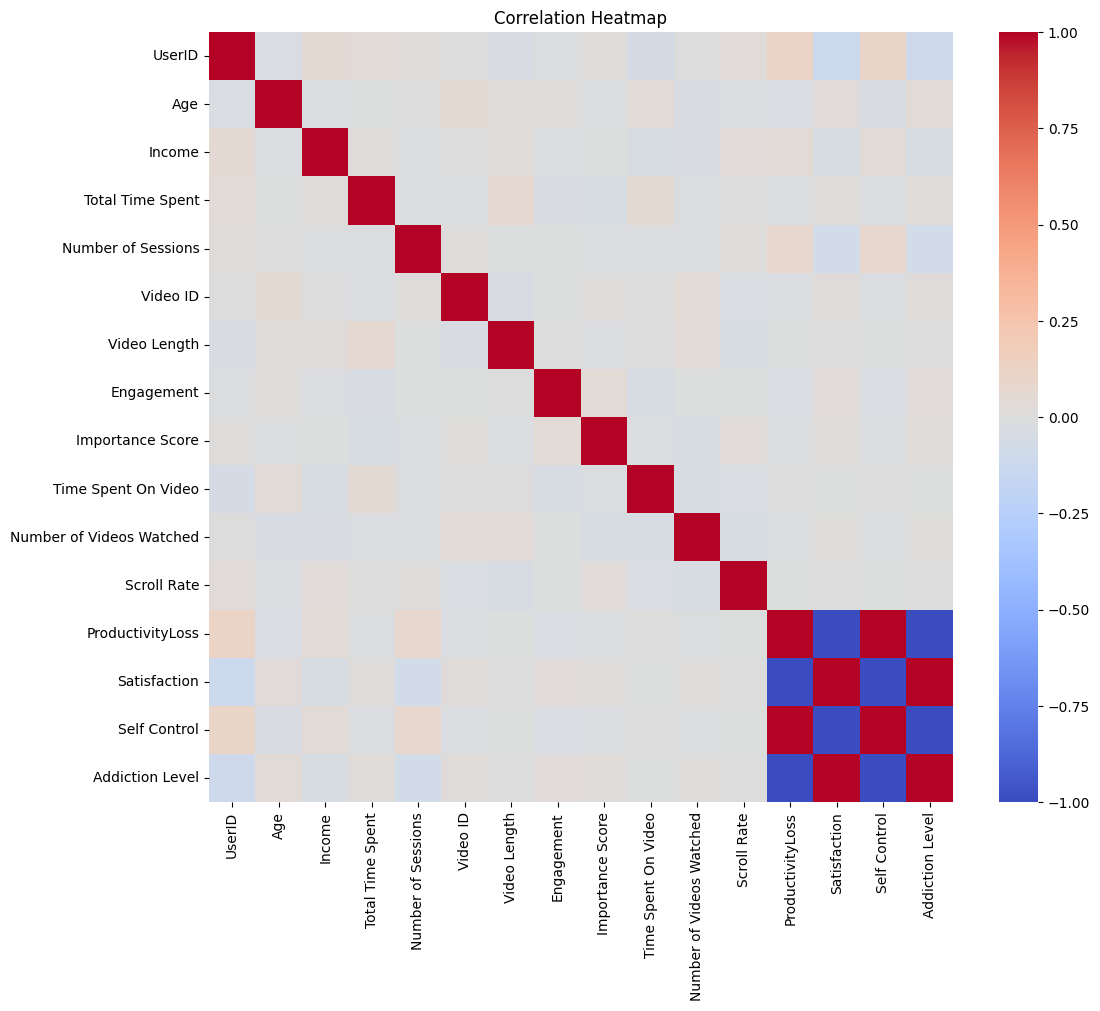

In [18]:
# 4. Correlation Heatmap
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
correlation_matrix = df[numeric_columns].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()